In [1]:
%load_ext autoreload
%autoreload 2

In [129]:
from vae import VAE

import torch
from torch.utils.data import Dataset
from torchvision.datasets import CIFAR10
import torchvision.transforms as T
import matplotlib.pyplot as plt

In [162]:
!tree lightning_logs

lightning_logs
├── version_0
│   ├── checkpoints
│   │   └── epoch=17.ckpt
│   ├── events.out.tfevents.1598897294.beast.10318.0
│   └── hparams.yaml
├── version_1
│   ├── checkpoints
│   │   └── epoch=45.ckpt
│   ├── events.out.tfevents.1598898595.beast.12224.0
│   └── hparams.yaml
├── version_2
│   ├── checkpoints
│   │   └── epoch=9.ckpt
│   ├── events.out.tfevents.1598901916.beast.16914.0
│   └── hparams.yaml
├── version_3
│   ├── checkpoints
│   │   └── epoch=9.ckpt
│   ├── events.out.tfevents.1598902692.beast.19293.0
│   └── hparams.yaml
└── version_4
    ├── checkpoints
    │   └── epoch=15.ckpt
    ├── events.out.tfevents.1598903672.beast.21291.0
    └── hparams.yaml

10 directories, 15 files


In [163]:
vae = VAE.load_from_checkpoint("lightning_logs/version_4/checkpoints/epoch=15.ckpt")
vae.eval();

In [164]:
ds = CIFAR10("data", train=False, transform=T.ToTensor())

In [169]:
example = 4

In [170]:
img = ds[example][0]
with torch.no_grad():
    x = vae.encoder(img.unsqueeze(0))
    mu = vae.fc_mu(x)
    reconst = vae.decoder(mu).squeeze()

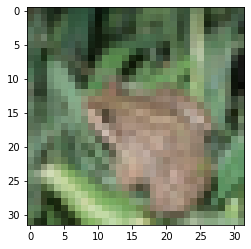

In [171]:
plt.imshow(img.permute(1, 2, 0).numpy())

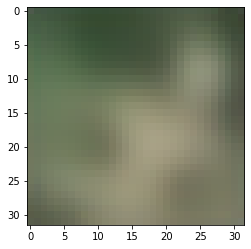

In [172]:
plt.imshow(reconst.permute(1, 2, 0).numpy())

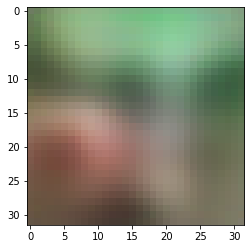

In [174]:
with torch.no_grad():
    z = torch.randn_like(mu)
    gen = vae.decoder(z).squeeze()
    
plt.imshow(gen.permute(1, 2, 0).numpy())

In [134]:
def tsne(model, dataset):
    dl = DataLoader(dataset, batch_size=64, num_workers=8)
    for (x, y) in dl:
        mu, _, _ = model.encode(x)
    